In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)
%matplotlib inline
from scipy import optimize as opt
from scipy import signal as sig
import pandas as pd
pd.set_option('display.max_colwidth', -1)

Fitted curves

Time range: 
t_test = np.linspace(0.01, 70.4, 500)

* Colony 1 and 6 use different fitfunc. All other colonies use the same one. 

Fitted curve for colony 1: *
fitfunc3 = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**3.3 + p[5]*t**4
p1_3 = [  6.84009672e-02   6.87500706e-03  -8.32146919e-04   1.07977683e-04  -3.55518690e-05   4.28763494e-07]

Fitted curve for colony 2:
fitfunc = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**4
p1 = [  5.66531793e-02   4.85815849e-04  -3.37169422e-06  -4.02585361e-07   9.86464027e-09]

Fitted curve for colony 3:
fitfunc = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**4
p1 = [  6.63204678e-02   5.58380075e-03  -1.97454799e-04   4.29956069e-06  -2.27520955e-08]

Fitted curve for colony 4:
fitfunc = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**4
p1 = [  5.61285360e-02   1.20849670e-03  -1.54473457e-04   6.90386727e-06  -6.10220518e-08]

Fitted curve for colony 5:
fitfunc = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**4
p1 = [  8.48033900e-02   1.35339550e-03   3.54552540e-04  -3.68269638e-06   2.59715433e-09]

Fitted curve for colony 6: *
fitfunc2 = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**3.3
p1 = [  5.02309133e-02   1.56640096e-02  -9.21853446e-04   4.44722019e-05  -9.40703356e-06]

In [3]:
df_pos1 = pd.read_csv('20170829_pos1_wCtime.csv')

In [4]:
df_pos1_gfp = df_pos1[df_pos1['Col 2'] > 0]
df_pos1_rfp = df_pos1[df_pos1['Col 1'] > 0]
time_elapsed_gfp = df_pos1_gfp['Time elapsed'].values
time_elapsed_rfp = df_pos1_rfp['Time elapsed'].values

Col 1
[  6.84010366e-02   6.87497332e-03  -8.32142479e-04   1.07977199e-04
  -3.55517173e-05   4.28761846e-07]
Col 2
[  5.66531793e-02   4.85815849e-04  -3.37169422e-06  -4.02585361e-07
   9.86464027e-09]
Col 3
[  6.63204678e-02   5.58380075e-03  -1.97454799e-04   4.29956069e-06
  -2.27520955e-08]
Col 4
[  5.61285360e-02   1.20849670e-03  -1.54473457e-04   6.90386727e-06
  -6.10220518e-08]
Col 5
[  8.48033900e-02   1.35339550e-03   3.54552540e-04  -3.68269638e-06
   2.59715433e-09]
Col 6
[  5.02309191e-02   1.56640083e-02  -9.21853357e-04   4.44721980e-05
  -9.40703274e-06]


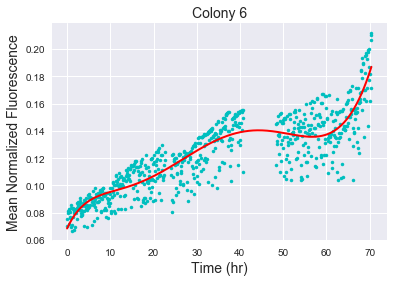

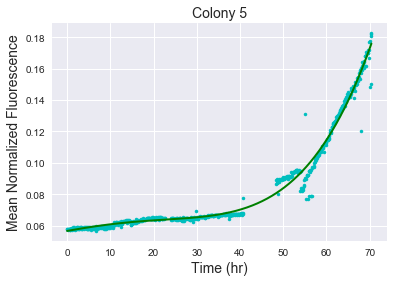

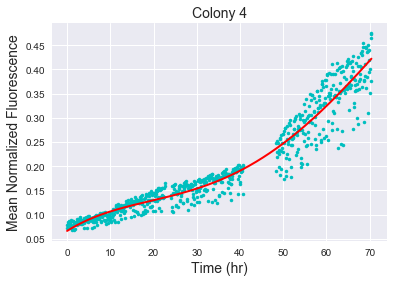

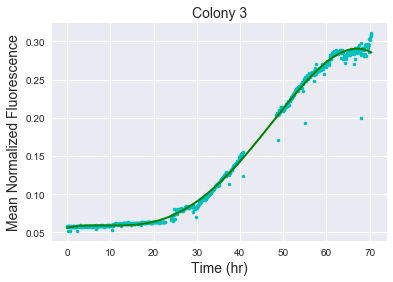

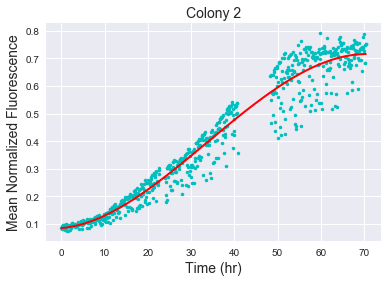

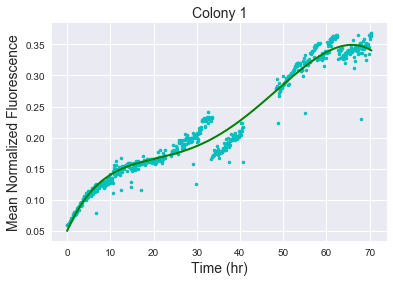

In [45]:
fitfunc3 = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**3.3 + p[5]*t**4
errfunc3 = lambda p, t, y: fitfunc3(p, t) - y # Distance to the target function
t_test = np.linspace(0.01, 70.4, 500)

response = df_pos1_rfp['Col 1'].values
response = sig.wiener(response, mysize=15)
fig, ax = plt.subplots(1, 1)
p0_3 = np.array([0, 0, 0, 0, 0, 0]) # Initial guess for the parameters
p1_1, success = opt.leastsq(errfunc3, p0_3, args=(time_elapsed_gfp, response))
plt.plot(time_elapsed_gfp, df_pos1_rfp['Col 1'].values, "c.", t_test, fitfunc3(p1_1, t_test), "r-") # Plot of the data and the fit
response = df_pos1_gfp['Col 6'].values
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')
plt.title('Colony 6')
#fig, ax = plt.subplots(1, 1)
#plt.plot(t_test, np.gradient(fitfunc3(p1_1, t_test)), "r-")
print('Col 1')
print(p1_1)

fitfunc = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**4 # Target function
errfunc = lambda p, t, y: fitfunc(p, t) - y # Distance to the target function
t_test = np.linspace(0.01, 70.4, 500)
    
response = df_pos1_gfp['Col 2'].values
fig, ax = plt.subplots(1, 1)
p0 = np.array([0, 0, 0, 0, 0]) # Initial guess for the parameters
p1_2, success = opt.leastsq(errfunc, p0, args=(time_elapsed_gfp, response))
plt.plot(time_elapsed_gfp, df_pos1_gfp['Col 2'].values, "c.", t_test, fitfunc(p1_2, t_test), "g-") # Plot of the data and the fit
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')
plt.title('Colony 5')

#fig, ax = plt.subplots(1, 1)
#plt.plot(t_test, np.gradient(fitfunc(p1_2, t_test)), "r-")
    
print('Col 2')
print(p1_2)
    
response = df_pos1_rfp['Col 3'].values
response = sig.wiener(response, mysize=15)
p0 = np.array([0, 0, 0, 0, 0]) # Initial guess for the parameters
p1_3, success = opt.leastsq(errfunc, p0, args=(time_elapsed_rfp, response))
fig, ax = plt.subplots(1, 1)
plt.plot(time_elapsed_rfp, df_pos1_rfp['Col 3'].values, "c.", t_test, fitfunc(p1_3, t_test), "r-") # Plot of the data and the fit
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')
plt.title('Colony 4')    
#fig, ax = plt.subplots(1, 1)
#plt.plot(t_test, np.gradient(fitfunc(p1_3, t_test)), "r-")
    
print('Col 3')
print(p1_3)

response = df_pos1_gfp['Col 4'].values
fig, ax = plt.subplots(1, 1)
p0 = np.array([0, 0, 0, 0, 0]) # Initial guess for the parameters
p1_4, success = opt.leastsq(errfunc, p0, args=(time_elapsed_gfp, response))
plt.plot(time_elapsed_gfp, df_pos1_gfp['Col 4'].values, "c.", t_test, fitfunc(p1_4, t_test), "g-") # Plot of the data and the fit
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')
plt.title('Colony 3')
#fig, ax = plt.subplots(1, 1)
#plt.plot(t_test, np.gradient(fitfunc(p1_4, t_test)), "r-")
    
print('Col 4')
print(p1_4)

response = df_pos1_rfp['Col 5'].values
response = sig.wiener(response, mysize=15)
p0 = np.array([0, 0, 0, 0, 0]) # Initial guess for the parameters
p1_5, success = opt.leastsq(errfunc, p0, args=(time_elapsed_rfp, response))
fig, ax = plt.subplots(1, 1)
plt.plot(time_elapsed_rfp, df_pos1_rfp['Col 5'].values, "c.", t_test, fitfunc(p1_5, t_test), "r-") # Plot of the data and the fit
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')
plt.title('Colony 2')    
#fig, ax = plt.subplots(1, 1)
#plt.plot(t_test, np.gradient(fitfunc(p1_5, t_test)), "r-")
    
print('Col 5')
print(p1_5)

fitfunc2 = lambda p, t: p[0] + p[1]*t + p[2]*t**2 + p[3]*t**3 + p[4]*t**3.3 
errfunc2 = lambda p, t, y: fitfunc2(p, t) - y # Distance to the target function
t_test = np.linspace(0.01, 70.4, 500)

response = df_pos1_gfp['Col 6'].values
response = sig.wiener(response, mysize=5)
fig, ax = plt.subplots(1, 1)
p0_2 = np.array([0, 0, 0, 0, 0]) # Initial guess for the parameters
p1_6, success = opt.leastsq(errfunc2, p0_2, args=(time_elapsed_gfp, response))
plt.plot(time_elapsed_gfp, df_pos1_gfp['Col 6'].values, "c.", t_test, fitfunc2(p1_6, t_test), "g-") # Plot of the data and the fit
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')
plt.title('Colony 1')
#fig, ax = plt.subplots(1, 1)
#plt.plot(t_test, np.gradient(fitfunc2(p1_6, t_test)), "r-")

print('Col 6')
print(p1_6)

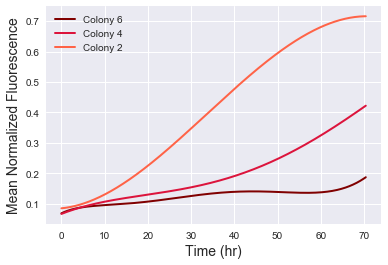

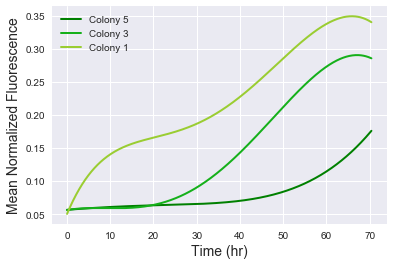

In [46]:
fig, ax = plt.subplots(1, 1)
plt.plot(t_test, fitfunc3(p1_1, t_test), 'maroon', label='Colony 6')
plt.plot(t_test, fitfunc(p1_3, t_test), "crimson", label='Colony 4')
plt.plot(t_test, fitfunc(p1_5, t_test), "tomato", label='Colony 2') 
ax.legend()
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')

fig, ax = plt.subplots(1, 1)
plt.plot(t_test, fitfunc(p1_2, t_test), "green", label='Colony 5') 
plt.plot(t_test, fitfunc(p1_4, t_test), "xkcd:green", label='Colony 3')
plt.plot(t_test, fitfunc2(p1_6, t_test), "yellowgreen", label='Colony 1')
ax.legend()
plt.xlabel('Time (hr)')
plt.ylabel('Mean Normalized Fluorescence')